<a id='1'></a><center> <h3 style="background-color:skyblue; color:purple" ><br>Life Expectancy Analysis<br></h3>

In [209]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

### Load the data set

In [117]:
df=pd.read_csv(r"D:\OneDrive\Venkat.My_projects\Machine_learning_projects\Life Expectency analysis\Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [119]:
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [120]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<a id='1'></a><center> <h3 style="background-color:skyblue; color:purple" ><br>Data Cleaning<br></h3>

In [121]:
df.columns = df.columns.str.strip()  # Clean all column names

In [122]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [123]:
df['Life expectancy'] = df['Life expectancy'].fillna(df['Life expectancy'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df['thinness  1-19 years'] = df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].mean())
df['thinness 5-9 years'] = df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())
df['Diphtheria'] = df['Diphtheria'].fillna(df['Diphtheria'].mean())
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].mean())
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
# df['Polio'] = df['Polio'].fillna(df['Polio'].mean())

In [124]:
df=df.drop_duplicates()

In [125]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [126]:
df.shape

(2938, 22)

<a id='1'></a><center> <h3 style="background-color:skyblue; color:purple" ><br>EDA(Exploratory data analysis)<br></h3> 

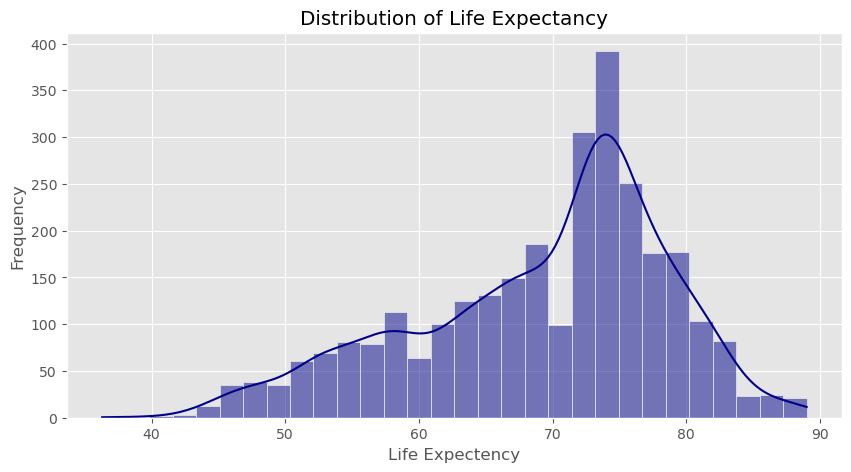

In [127]:
plt.figure(figsize=(10,5))
sns.histplot(df['Life expectancy'],bins=30,kde=True,color='darkblue')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectency")
plt.ylabel("Frequency")
plt.show()

In [128]:
if 'Country' in df.columns and 'Status' in df.columns:
    correlation=df.drop(columns=['Country','Status']).corr()
else:
    correlation=df.corr()

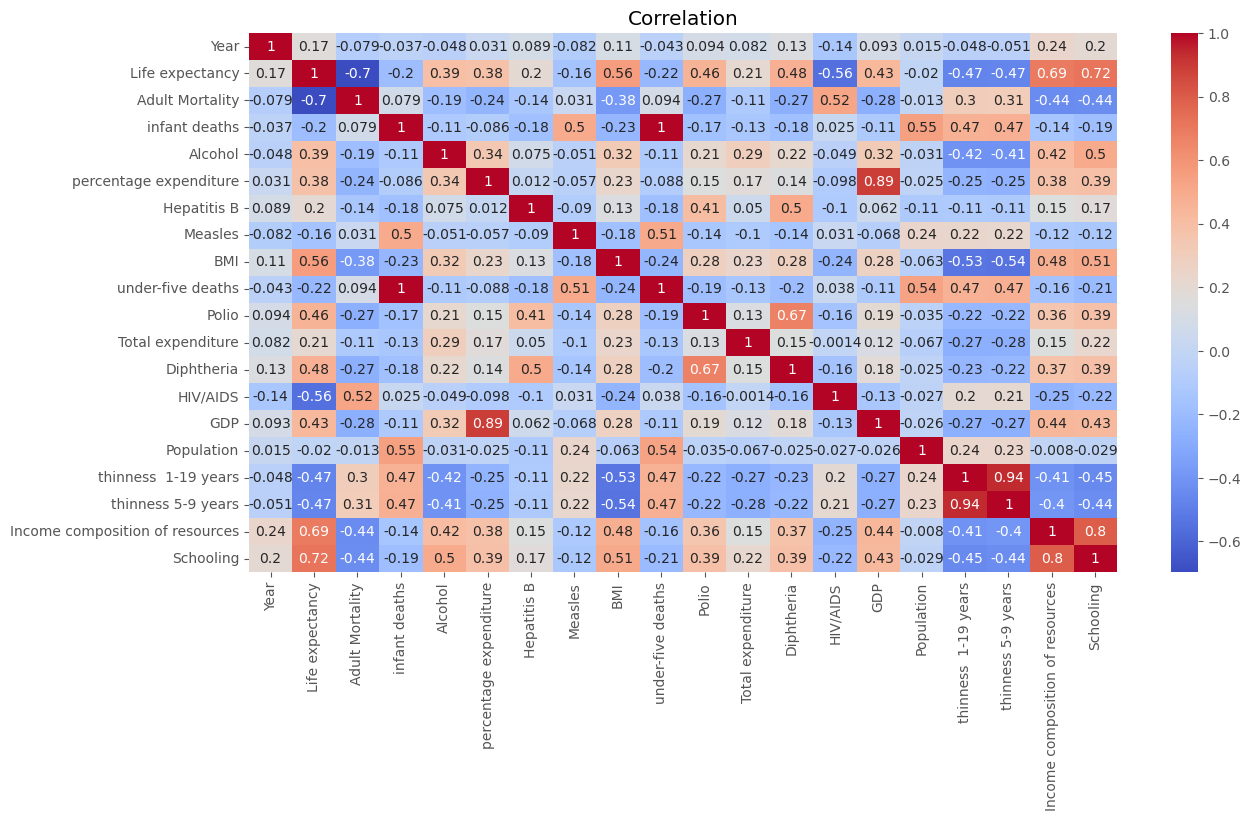

In [129]:
plt.figure(figsize=(14,7))
# print(correlation)
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation")
plt.show()

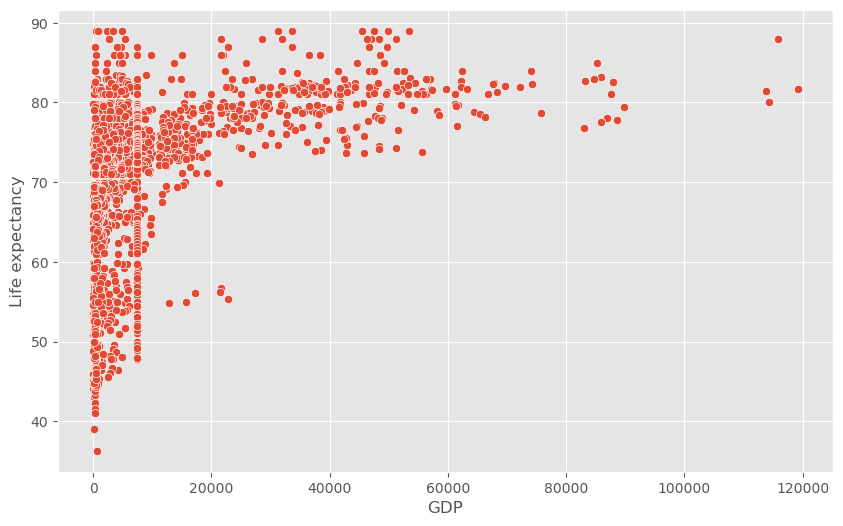

In [130]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GDP',y='Life expectancy',data=df)
plt.show()

In [131]:
pearson_corr, p_value = stats.pearsonr(df['GDP'], df['Life expectancy'])
print(f'Correlation between GDP and Life Expectancy: {pearson_corr:.2f}')
print(f'P-value: {p_value:.4f}')


Correlation between GDP and Life Expectancy: 0.43
P-value: 0.0000


### Regression Analysis


In [132]:
import statsmodels.api as sm

In [133]:
df.sample(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1357,Kazakhstan,2004,Developing,64.7,287.0,8,6.55,33.916602,99.0,2204,...,99.0,3.95,82.0,0.1,2874.288291,1512985.0,2.5,2.6,0.725,13.5
2138,Russian Federation,2012,Developing,69.6,237.0,14,10.99,178.822591,97.0,2123,...,98.0,6.88,97.0,0.3,15154.456870,14321676.0,2.3,2.4,0.792,14.3


In [134]:
x=df[['GDP','Total expenditure','Schooling','Adult Mortality','Alcohol']]
y=df['Life expectancy']
print(x.shape)
print(y.shape)

(2938, 5)
(2938,)


In [135]:
X=sm.add_constant(x)
X

,const,GDP,Total expenditure,Schooling,Adult Mortality,Alcohol
0,1.0,584.259210,8.16,10.1,263.0,0.01
1,1.0,612.696514,8.18,10.0,271.0,0.01
2,1.0,631.744976,8.13,9.9,268.0,0.01
3,1.0,669.959000,8.52,9.8,272.0,0.01
4,1.0,63.537231,7.87,9.5,275.0,0.01
...,...,...,...,...,...,...
2933,1.0,454.366654,7.13,9.2,723.0,4.36
2934,1.0,453.351155,6.52,9.5,715.0,4.06
2935,1.0,57.348340,6.53,10.0,73.0,4.43
2936,1.0,548.587312,6.16,9.8,686.0,1.72


In [136]:
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1405.
Date:                Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                        18:29:28   Log-Likelihood:                -8989.2
No. Observations:                2938   AIC:                         1.799e+04
Df Residuals:                    2932   BIC:                         1.803e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                57.7842      0.52

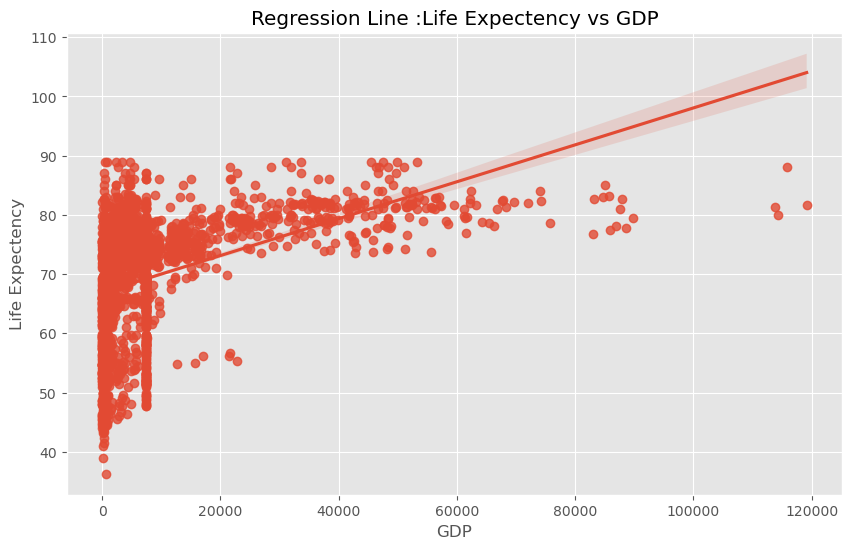

In [137]:
plt.figure(figsize=(10,6))
sns.regplot(x='GDP',y='Life expectancy',data=df)
plt.title('Regression Line :Life Expectency vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectency')
plt.show()

In [138]:
num_col=df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

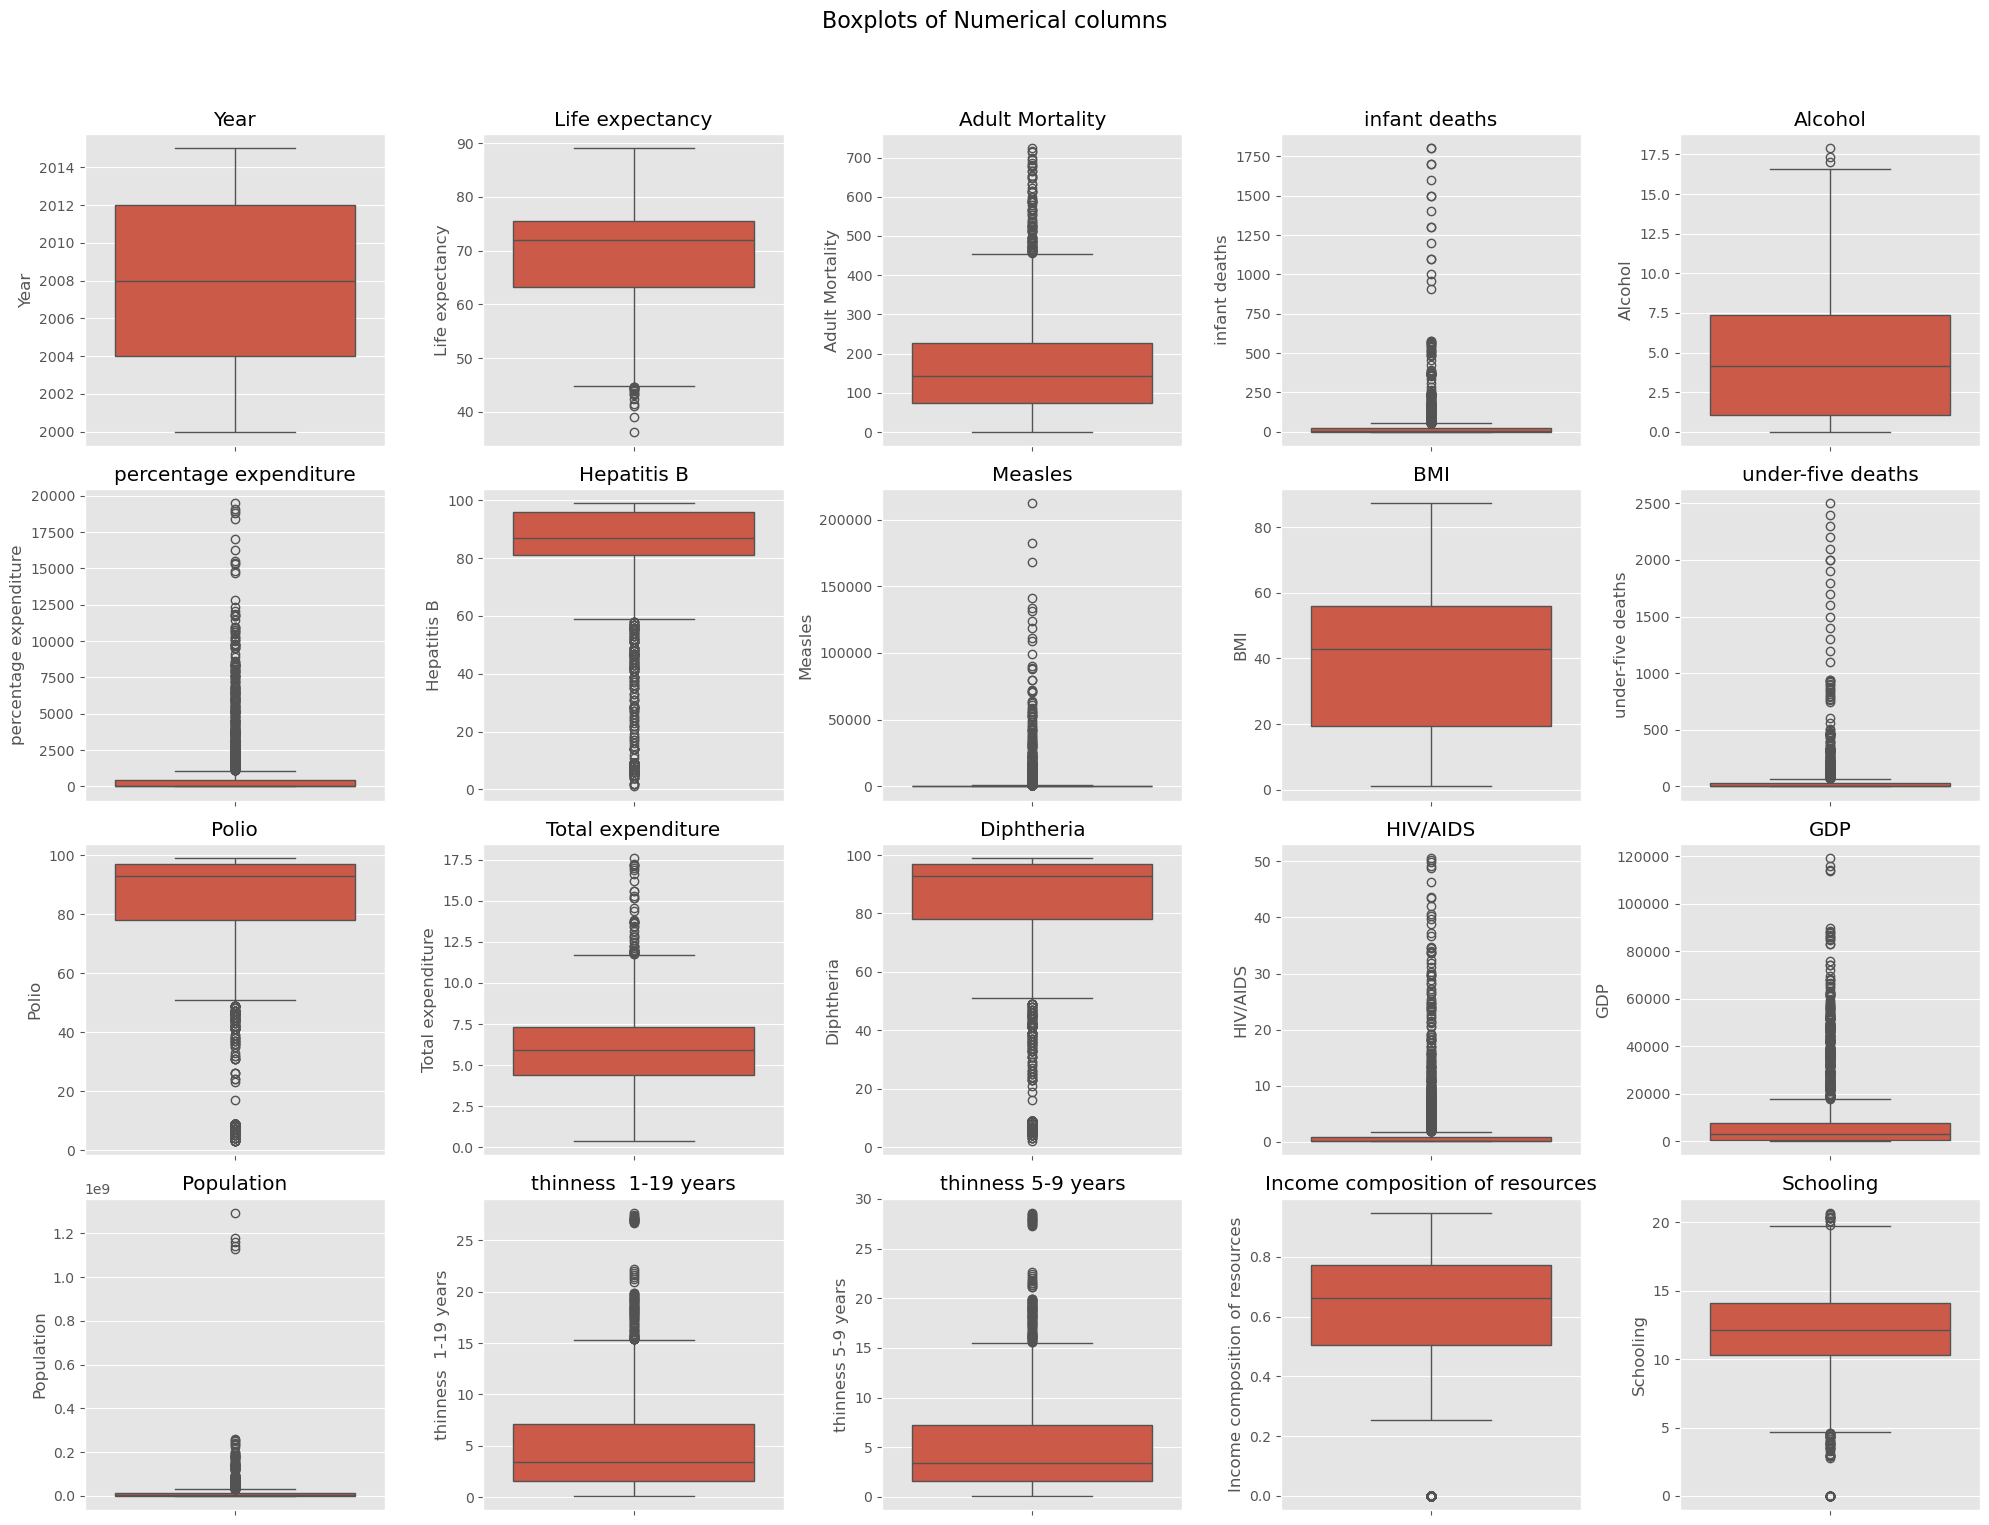

In [139]:
fig,axes=plt.subplots(4,5,figsize=(20,16))
fig.suptitle('Boxplots of Numerical columns',fontsize=16)
axes=axes.flatten()
for i,col in enumerate(num_col):
    sns.boxplot(y=df[col],ax=axes[i])
    axes[i].set_title(col)

for j in range(len(num_col),len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [140]:
col_name=df.columns
col_name

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [141]:
num_col=df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

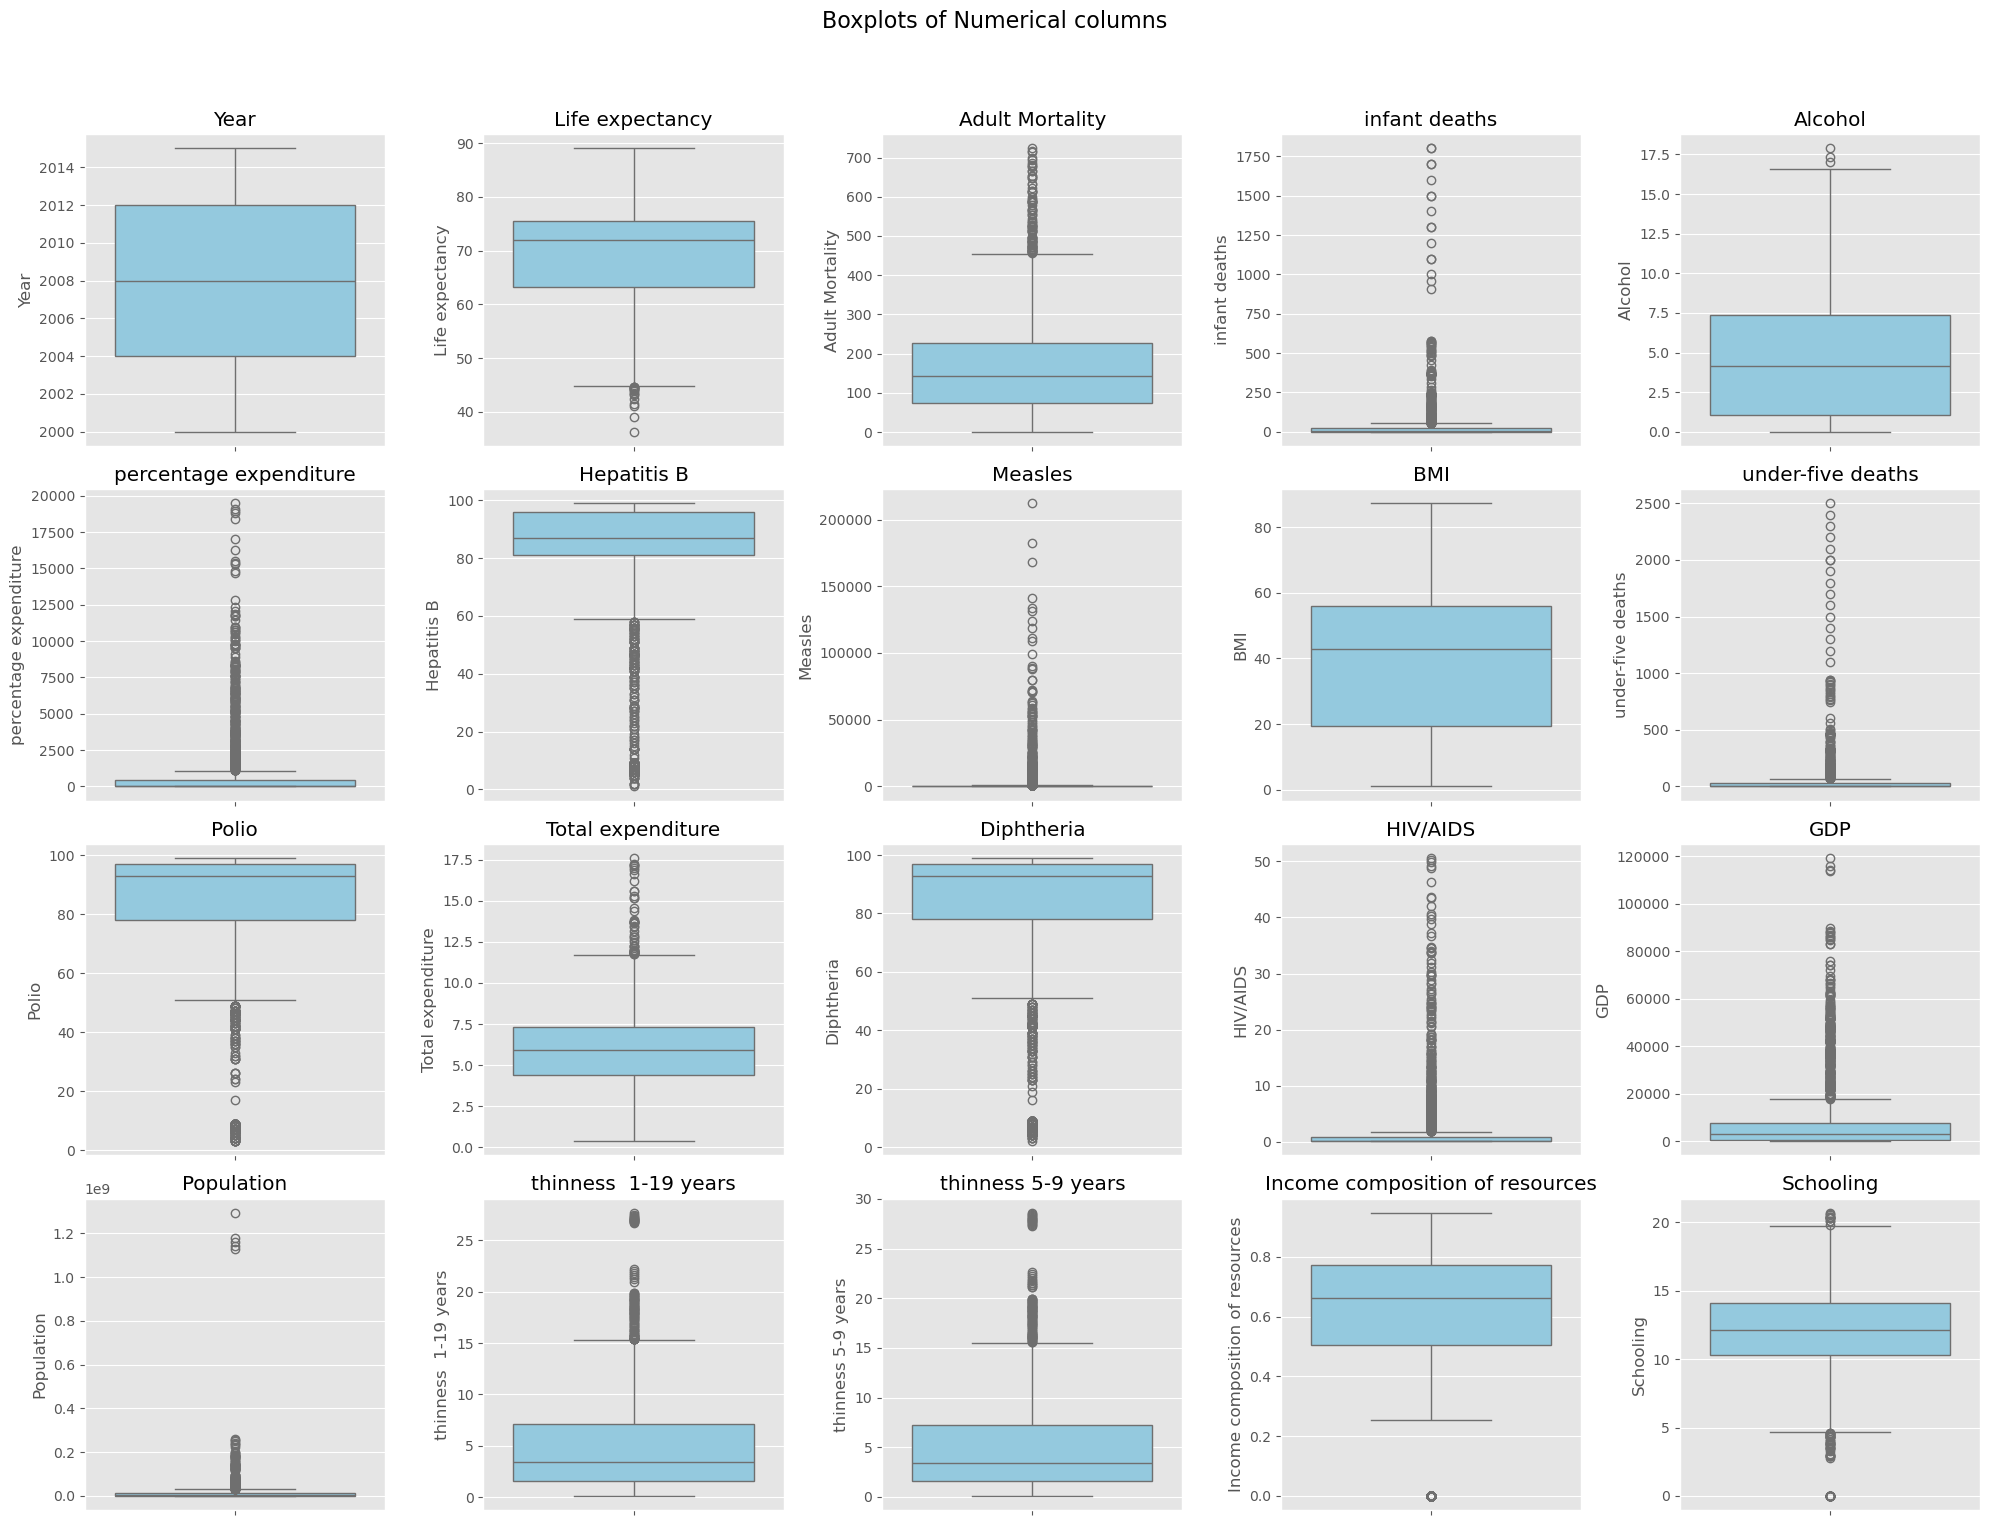

In [142]:
fig,axes=plt.subplots(4,5,figsize=(20,16))
fig.suptitle('Boxplots of Numerical columns',fontsize=16)
axes=axes.flatten()
for i,col in enumerate(num_col):
    sns.boxplot(y=df[col],ax=axes[i],color='skyblue')
    axes[i].set_title(col)

for j in range(len(num_col),len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [143]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [144]:
df['Country'].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [145]:
avg_life_exp=df.groupby('Year')['Life expectancy'].mean().reset_index()
avg_life_exp

,Year,Life expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448
5,2005,68.209290
6,2006,68.667760
7,2007,69.036066
8,2008,69.427869
9,2009,69.938251


In [146]:
fig = px.line(
    avg_life_exp, 
    x='Year', 
    y='Life expectancy',
    title='Average Life Expectancy over the Years',
    labels={'Year': 'Year', 'Life expectancy': 'LifeExpectancy (years)'},
    template='plotly_dark'
)

fig.show()


In [147]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Population',
    y='Life expectancy',
    hover_name='Country',
    color='Status',
    animation_frame='Year',
    title='Population vs Life Expectancy',
    labels={
        'Population': 'Population',
        'Life expectancy': 'Life Expectancy (years)'
    },
    template='plotly_dark'
)

fig.show()

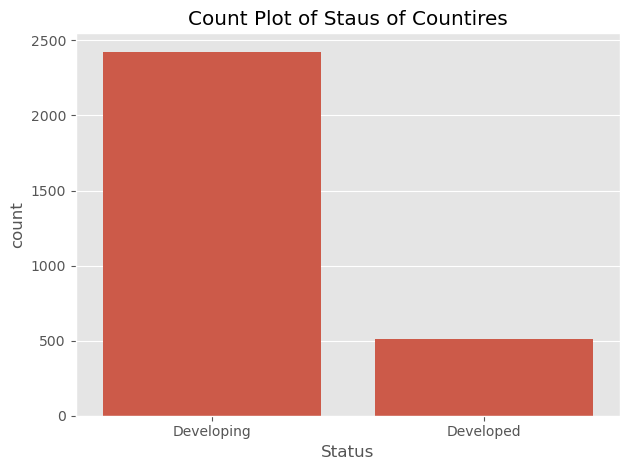

In [148]:
sns.countplot(x=df['Status'])
plt.title('Count Plot of Staus of Countires')
plt.tight_layout()
plt.show()

In [149]:
life_exp_status=df.groupby('Status')['Life expectancy'].mean().reset_index()
life_exp_status

,Status,Life expectancy
0,Developed,79.197852
1,Developing,67.120177


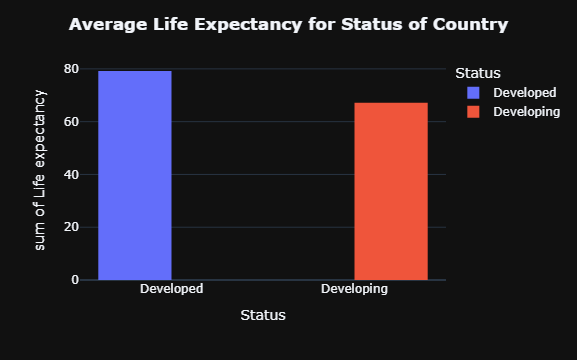

In [154]:
import plotly.express as px

fig = px.histogram(
    life_exp_status,
    x='Status',
    y='Life expectancy',
    color='Status',
    barmode='group',  # Optional: makes it more readable if there are multiple bars per group
    template='plotly_dark'
)

fig.update_layout(
    title=dict(text='<b>Average Life Expectancy for Status of Country</b>', x=0.5)
)

fig.show()


In [158]:
avg_data=df.groupby('Year').agg({
    'Life expectancy':'mean',
    'Alcohol':'mean'
}).reset_index()

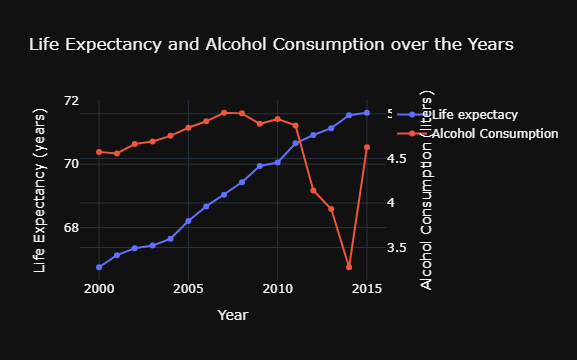

In [163]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=avg_data['Year'],y=avg_data['Life expectancy'],
                        mode='lines+markers',
                        name='Life expectacy',
                        yaxis='y1'))
fig.add_trace(go.Scatter(x=avg_data['Year'],y=avg_data['Alcohol'],
                        mode='lines+markers',
                        name='Alcohol Consumption',
                        yaxis='y2'))
fig.update_layout(
    title='Life Expectancy and Alcohol Consumption over the Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Life Expectancy (years)', side='left'),
    yaxis2=dict(title='Alcohol Consumption (liters)',
    side='right', overlaying='y'),
    template='plotly_dark'
)
fig.show()

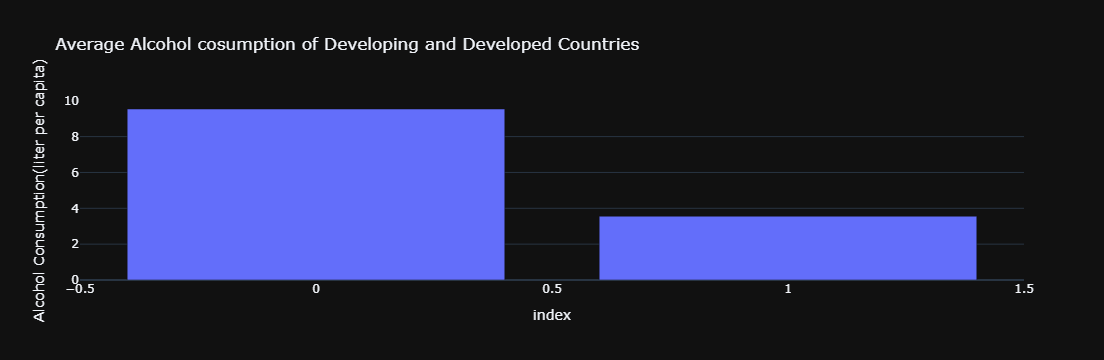

In [224]:
fig=px.bar(
    df.groupby('Status',as_index=False).agg({'Alcohol':'mean'}),
    y='Alcohol',
    title='Average Alcohol cosumption of Developing and Developed Countries',
    labels={'Alcohol':'Alcohol Consumption(liter per capita)','Life expectancy':'Life expectancy(years)'},
    template='plotly_dark'
)
fig.show()

In [166]:
agg_data=df.groupby('Schooling')['Life expectancy'].mean().reset_index()
agg_data

,Schooling,Life expectancy
0,0.0,63.333924
1,2.8,50.000000
2,2.9,55.625000
3,3.0,52.100000
4,3.1,52.900000
...,...,...
169,20.3,83.425000
170,20.4,81.666667
171,20.5,79.900000
172,20.6,83.000000


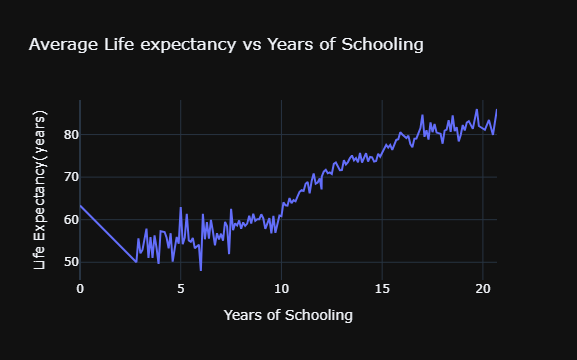

In [169]:
fig=px.line(
    agg_data,
    x='Schooling',
    y='Life expectancy',
    title='Average Life expectancy vs Years of Schooling',
    labels={'Schooling':'Years of Schooling','Life expectancy':'Life Expectancy(years)'},
    template='plotly_dark'
)
fig.show()

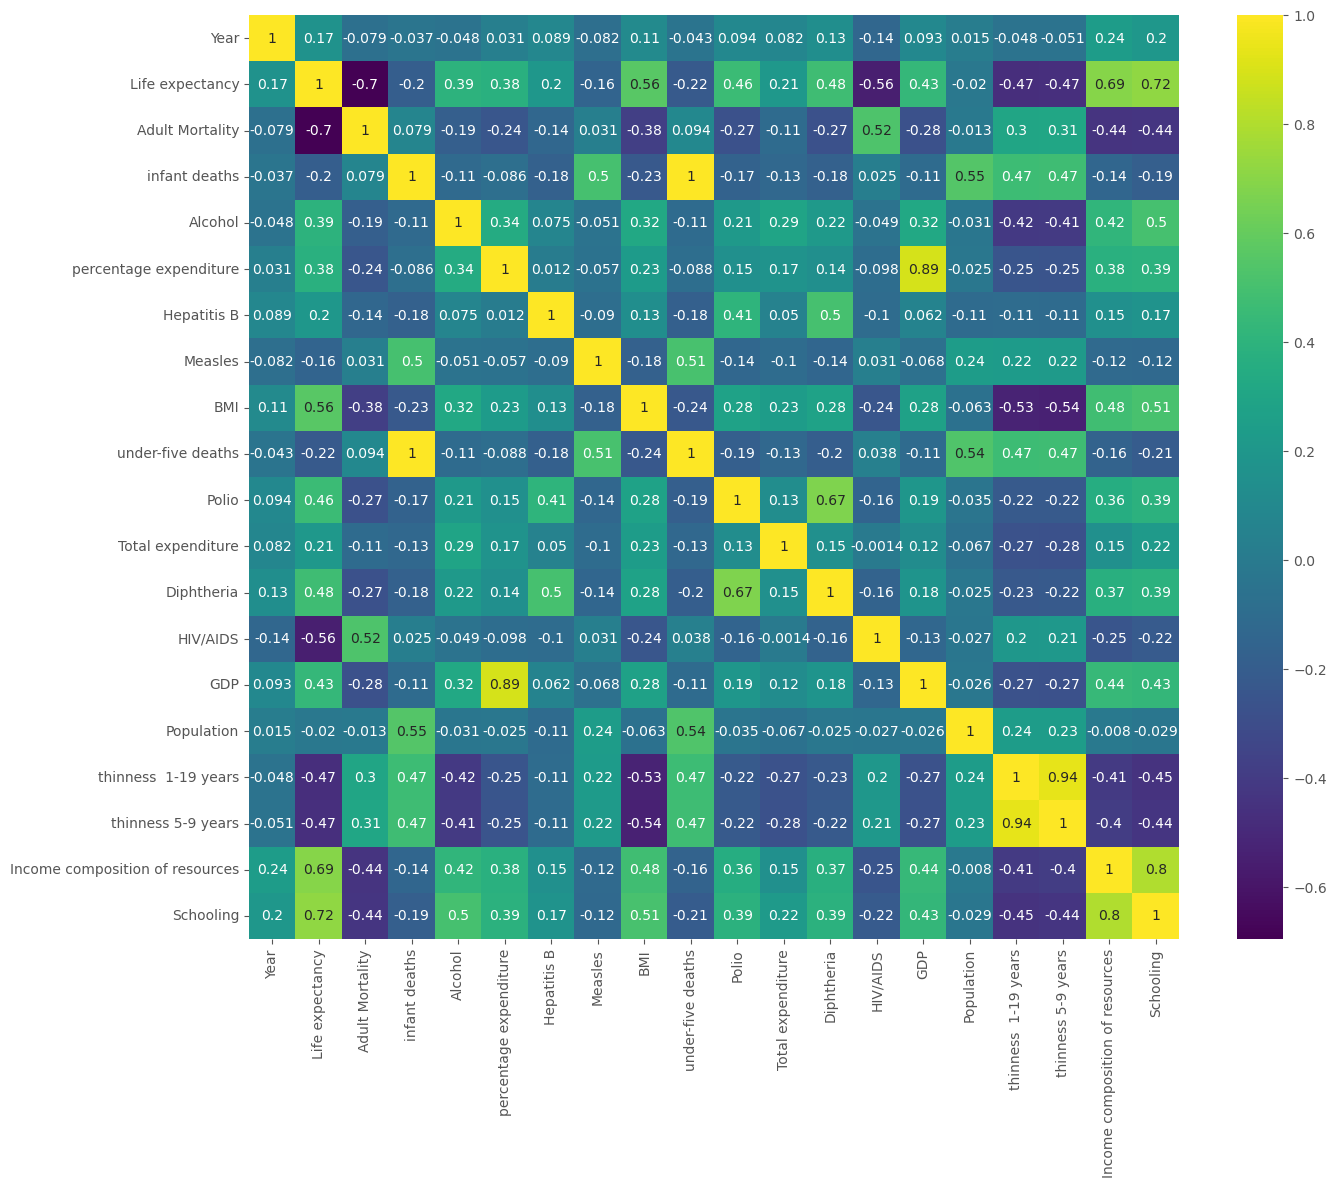

In [171]:
plt.figure(figsize=(15,12))
sns.heatmap(df[num_col].corr(),cmap='viridis',annot=True)
plt.show()

<a id='1'></a><center> <h3 style="background-color:skyblue; color:purple" ><br>Preprocessing<br></h3>

In [173]:
le=LabelEncoder()


In [177]:
cat_cols=df.select_dtypes(include='object').columns
for cols in cat_cols:
    df[cols]=le.fit_transform(df[cols])
cat_cols.shape

(0,)

In [183]:
x=df.drop(columns='Life expectancy')
y=df['Life expectancy']

In [185]:
scaler=StandardScaler()
cols_to_scale=x.drop(columns='Status').columns
x[cols_to_scale]=scaler.fit_transform(x[cols_to_scale])
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.621762,1,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,...,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,-1.691042,1.404986,1,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,...,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,-1.691042,1.188210,1,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,...,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,-1.691042,0.971434,1,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,...,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,-1.691042,0.754658,1,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,...,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764


In [189]:
! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.7 MB/s eta 0:01:29
   ---------------------------------------- 0.8/150.0 MB 1.5 MB/s eta 0:01:43
   ---------------------------------------- 1.3/150.0 MB 1.7 MB/s eta 0:01:27
   ---------------------------------------- 1.8/150.0 MB 1.9 MB/s eta 0:01:18
    --------------------------------------- 2.4/150.0 MB 2.0 MB/s eta 0:01:15
    --------------------------------------- 3.1/150.0 MB 2.3 MB/s eta 0:01:05
    --------------------------------------- 3.7/150.0 MB 2.3 MB/s eta 0:01:04
   - -------------------------------------- 4.2/150.0 MB 2.3 MB/s eta 0:01:04
   - -------------------------------------- 5.2/150.0 MB 2.6 MB/s eta 0:00:56
   - -------------------------------------- 6.6/150.0 MB 2.9 MB/s eta 0:00:49
   -- ------------------------------------- 8.1/150.0 MB 3.3 MB/s eta 0:00:43


<a id='1'></a><center> <h3 style="background-color:skyblue; color:purple" ><br>Model Building<br></h3>

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2350, 21), (588, 21), (2350,), (588,))

In [198]:
models={
    'Random Forest':RandomForestRegressor(random_state=42),
    'XGB Regrssion':XGBRegressor()
}
results=[]
models

{'Random Forest': RandomForestRegressor(random_state=42),
 'XGB Regrssion': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}

In [212]:
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)
    results.append({'Model':model_name,'RMSE':rmse,'R2 Score':r2})
results_df=pd.DataFrame(results)

In [213]:
result_df=results_df.sort_values('R2 Score',ascending=False)
result_df

,Model,RMSE,R2 score,R2 Score
7,XGB Regrssion,2.015130,NaN,0.957869
6,Random Forest,2.039486,NaN,0.956845
0,Random Forest,2.039486,0.956845,NaN
1,XGB Regrssion,2.015130,0.957869,NaN
2,Random Forest,2.039486,0.956845,NaN
3,XGB Regrssion,2.015130,0.957869,NaN
4,Random Forest,2.039486,0.956845,NaN
5,XGB Regrssion,2.015130,0.957869,NaN


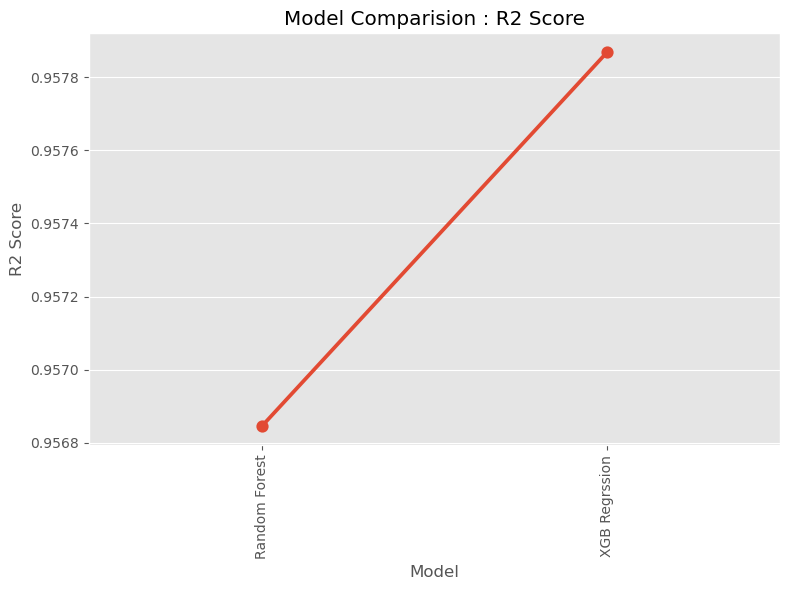

In [214]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='R2 Score',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparision : R2 Score')
plt.tight_layout()
plt.show()

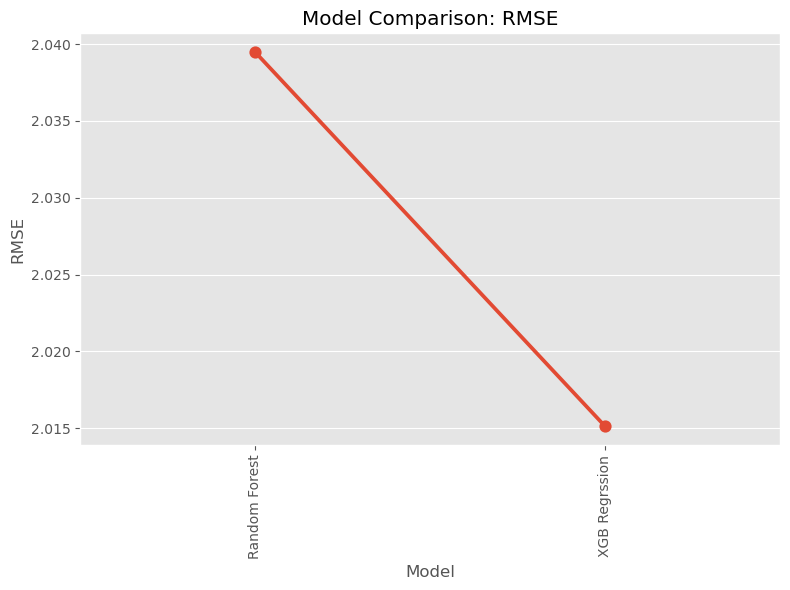

In [215]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='RMSE',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()


In [216]:
from sklearn.model_selection import cross_val_score, KFold

In [217]:
best_model = XGBRegressor()
kf = KFold(n_splits=20, shuffle=True, random_state=42)

In [218]:
cross_val = cross_val_score(best_model, x, y, cv= kf,scoring='r2')
cross_val

array([0.96634732, 0.96460079, 0.97812094, 0.96161071, 0.97314603,
       0.9561134 , 0.96785238, 0.96203766, 0.9769822 , 0.95600187,
       0.96524454, 0.96797178, 0.96657893, 0.96029813, 0.96781486,
       0.95382014, 0.95789983, 0.96879292, 0.96047869, 0.95815397])

Text(0.5, 1.0, 'Cross Validation scores')

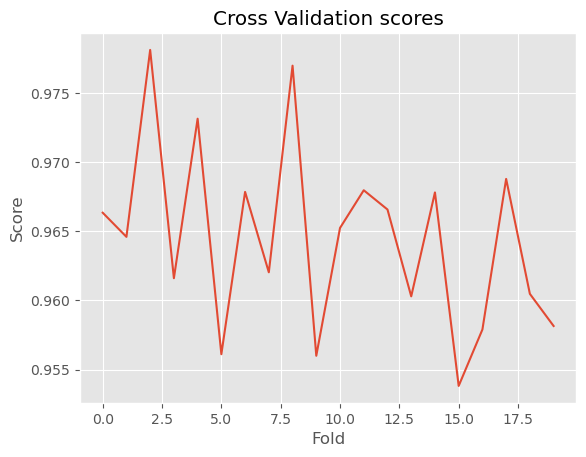

In [219]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title("Cross Validation scores")

In [221]:
cross_val.std()

0.00657944287734938

In [220]:
cross_val.mean()

0.9644933548288132